# Explore here

In [12]:
import pandas as pd

url = "https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

total_data = pd.read_csv(url)

print(total_data)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [13]:
total_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
total_data.shape

(768, 9)

In [15]:
total_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
null_counts = total_data.isnull().sum()
print(null_counts)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


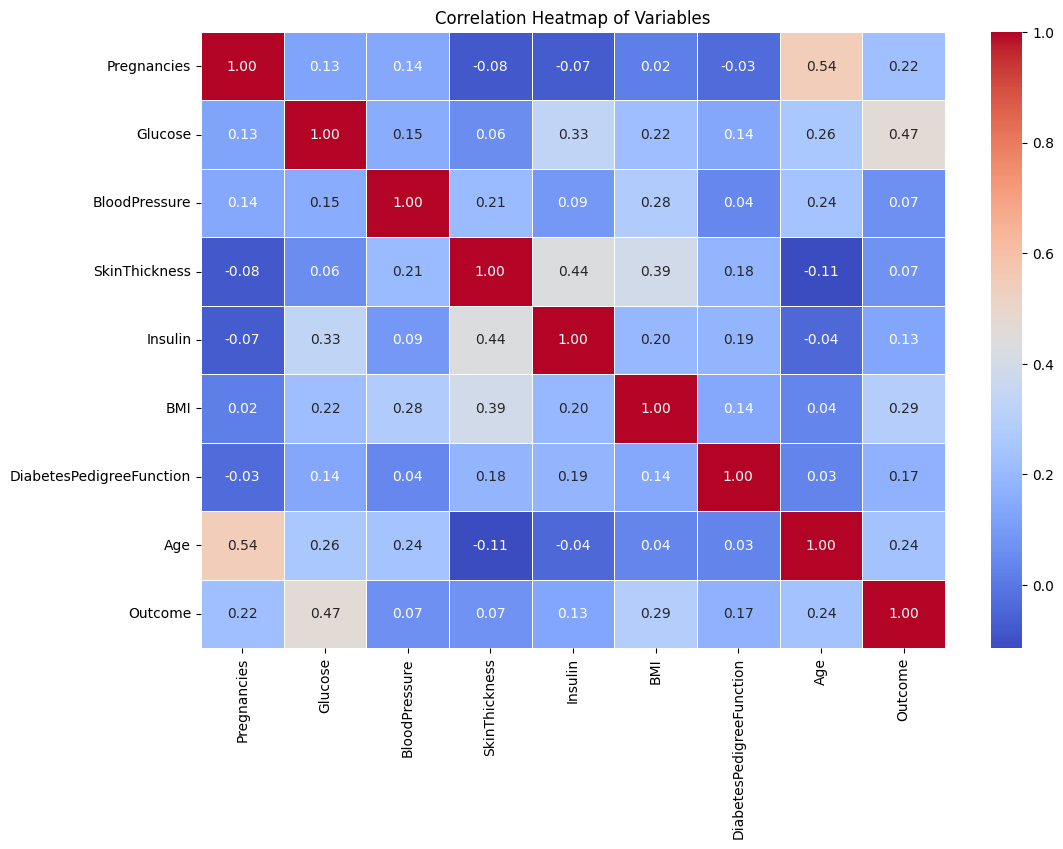

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(total_data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Variables')
plt.show()

In [18]:
total_data.drop(['BloodPressure', 'SkinThickness'], axis=1, inplace=True)


In [19]:
total_data.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1


In [20]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


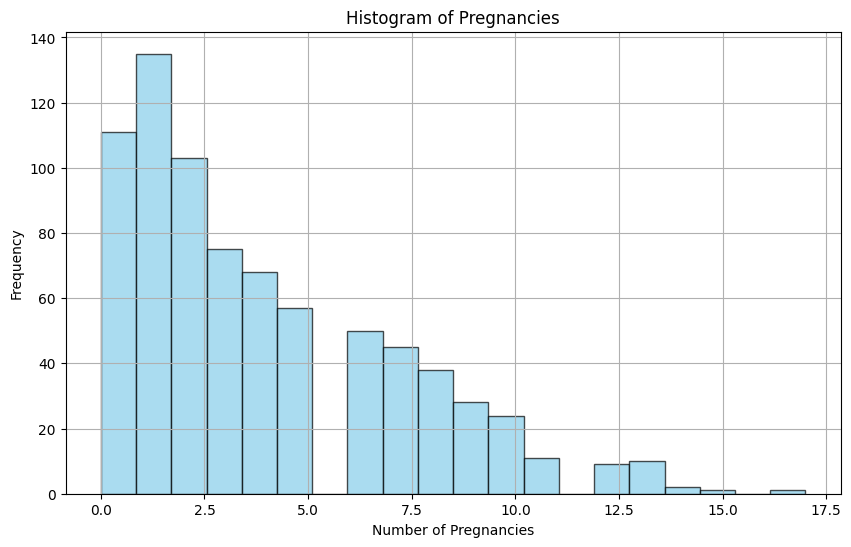

In [21]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
plt.hist(total_data['Pregnancies'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Pregnancies')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [22]:
def replace_outliers(val):
    if val > 10:
        return 10
    else:
        return val

# Replace outliers in the "Pregnancies" column
total_data['Pregnancies'] = total_data['Pregnancies'].apply(replace_outliers)

In [23]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.123898,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


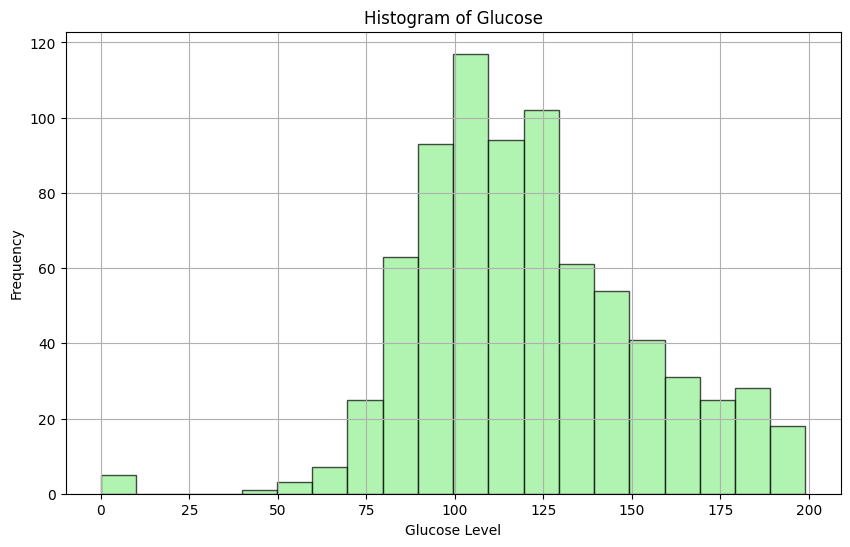

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(total_data['Glucose'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Glucose')
plt.xlabel('Glucose Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [25]:
# Define a function to replace values less than 50 with 50
def replace_values(val):
    if val < 50:
        return 50
    else:
        return val

# Replace values in the "Glucose" column
total_data['Glucose'] = total_data['Glucose'].apply(replace_values)

In [26]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.227865,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.123898,30.959138,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,50.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


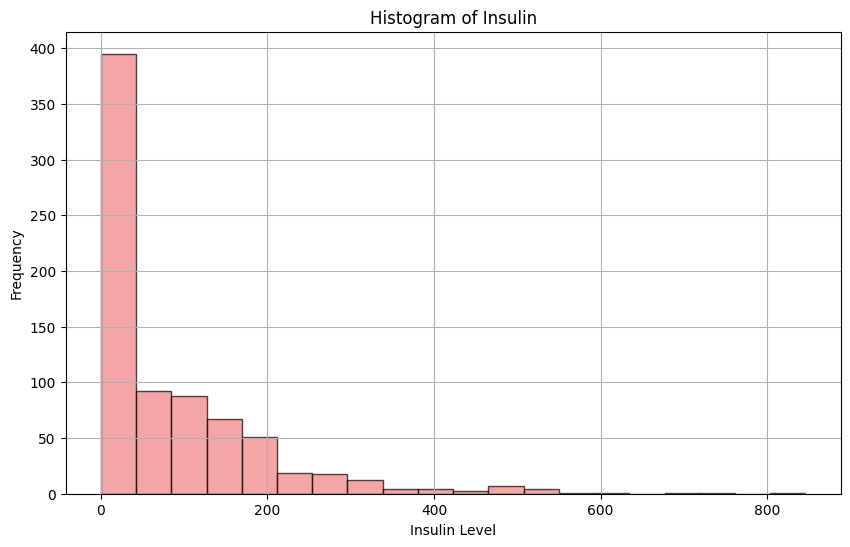

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(total_data['Insulin'], bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.title('Histogram of Insulin')
plt.xlabel('Insulin Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

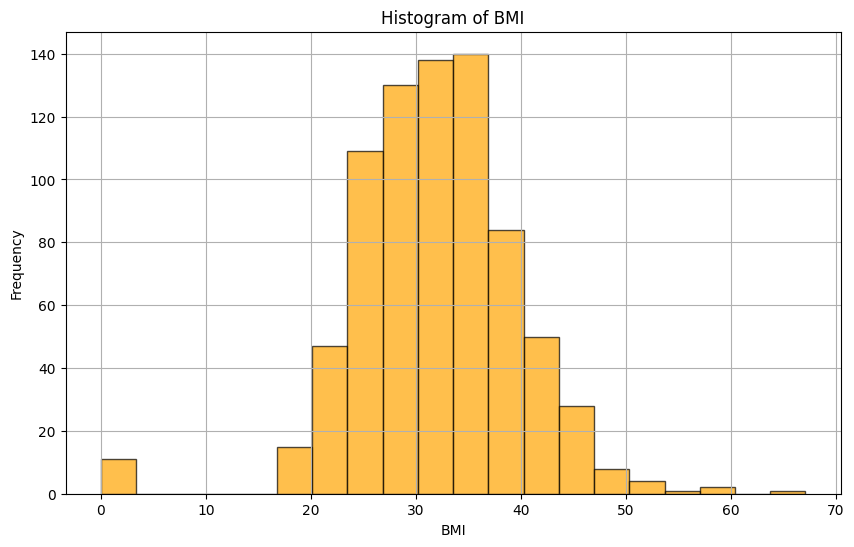

In [28]:
plt.figure(figsize=(10, 6))
plt.hist(total_data['BMI'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Histogram of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [29]:
# Calculate the mean of non-zero values in the "BMI" column
mean_bmi = total_data.loc[total_data['BMI'] != 0, 'BMI'].mean()

# Replace zero values with the mean
total_data['BMI'] = total_data['BMI'].replace(0, mean_bmi)

In [30]:
total_data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.742188,121.227865,79.799479,32.457464,0.471876,33.240885,0.348958
std,3.123898,30.959138,115.244002,6.875151,0.331329,11.760232,0.476951
min,0.000000,50.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,0.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,30.500000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,10.000000,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Accuracy: 0.7142857142857143

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       151
           1       0.61      0.47      0.54        80

    accuracy                           0.71       231
   macro avg       0.68      0.66      0.66       231
weighted avg       0.70      0.71      0.70       231


Confusion Matrix:
[[127  24]
 [ 42  38]]


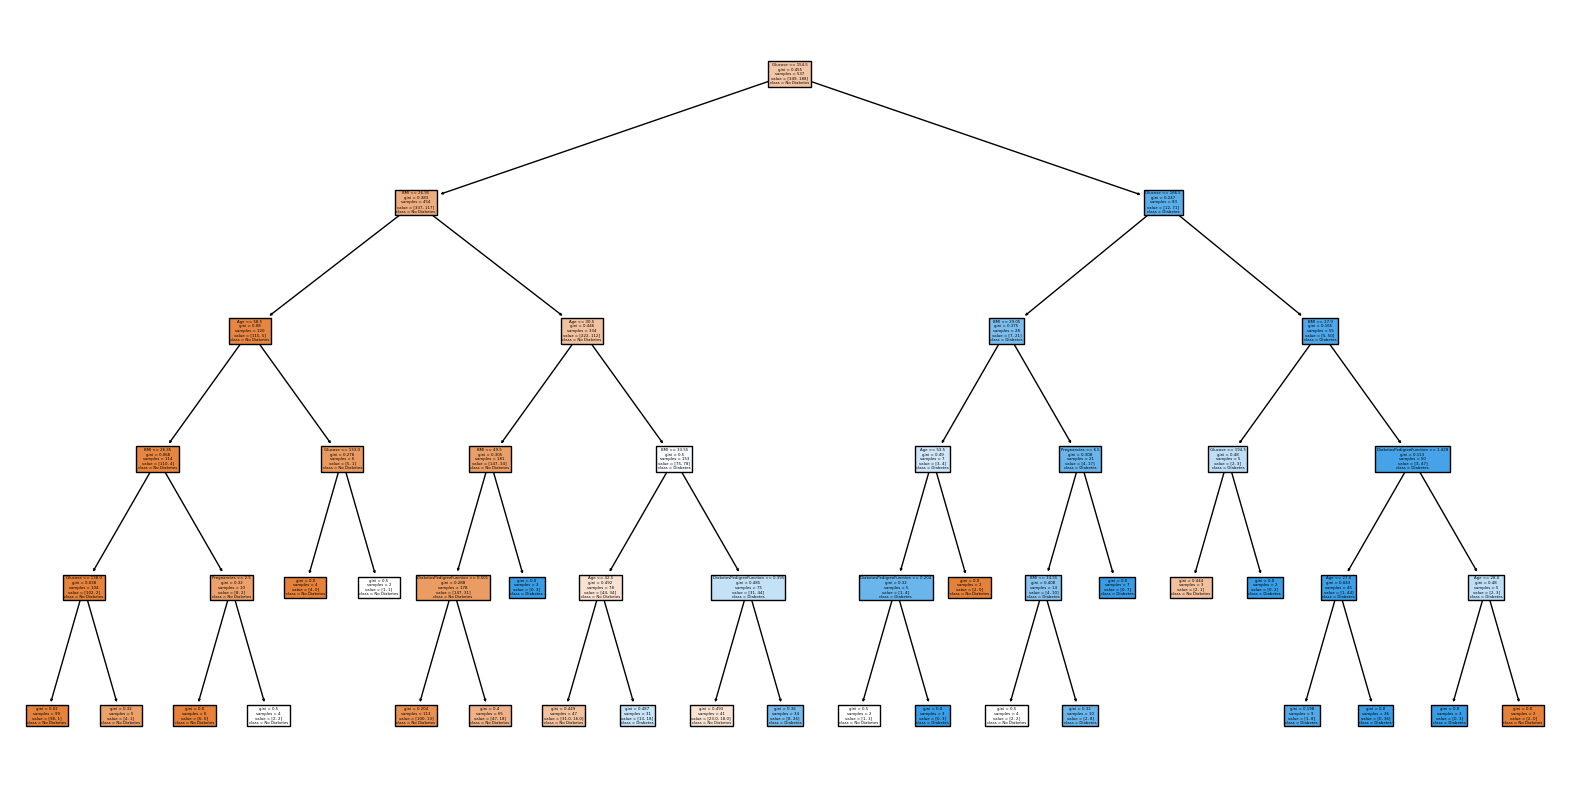

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Drop the outcome column to separate features and target variable
X = total_data.drop('Outcome', axis=1)  # Features (independent variables)
y = total_data['Outcome']  # Target variable (dependent variable)

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='gini')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the decision tree
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

In [32]:
# Analyze feature importances
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                    Feature  Importance
1                   Glucose    0.479731
5                       Age    0.216141
3                       BMI    0.214309
4  DiabetesPedigreeFunction    0.072111
0               Pregnancies    0.017707
2                   Insulin    0.000000


In [33]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
clf = RandomForestClassifier(
    n_estimators=100,  # Number of trees in the forest
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='gini',
    random_state=42)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7662337662337663

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       151
           1       0.68      0.62      0.65        80

    accuracy                           0.77       231
   macro avg       0.74      0.73      0.74       231
weighted avg       0.76      0.77      0.76       231


Confusion Matrix:
[[127  24]
 [ 30  50]]


In [34]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Create a random forest classifier
clf = RandomForestClassifier(
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='gini',
    random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Evaluate the best model
best_model = grid_search.best_estimator_
accuracy = accuracy_score(y_test, best_model.predict(X_test))
print("Accuracy of Best Model:", accuracy)


Best Hyperparameters: {'max_depth': 15, 'n_estimators': 100}
Accuracy of Best Model: 0.7705627705627706


In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X is your feature matrix and y is your target vector
# X_train, X_test, y_train, y_test will be your training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Create a random forest classifier
clf = RandomForestClassifier(
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    criterion='gini',
    random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:")
print(best_model)

# Make predictions on the testing data
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate a classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'max_depth': 15, 'n_estimators': 100}
Best Model:
RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)
Accuracy: 0.7705627705627706

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       151
           1       0.65      0.72      0.69        80

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.75       231
weighted avg       0.78      0.77      0.77       231


Confusion Matrix:
[[120  31]
 [ 22  58]]


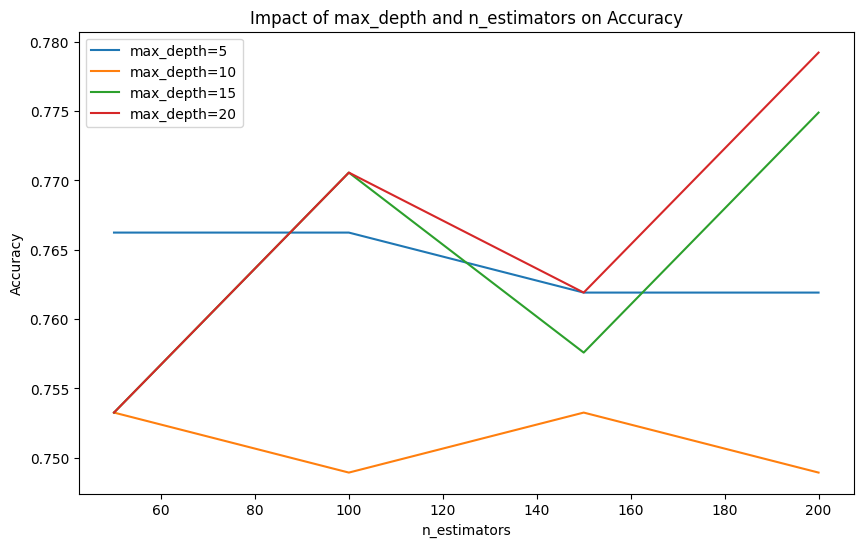

In [36]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define lists to store accuracies for different hyperparameters
max_depth_values = [5, 10, 15, 20]
n_estimators_values = [50, 100, 150, 200]
accuracies = []

for max_depth in max_depth_values:
    for n_estimators in n_estimators_values:
        # Create a random forest classifier with different hyperparameters
        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            criterion='gini',
            random_state=42)

        # Train the classifier on the training data
        clf.fit(X_train, y_train)

        # Make predictions on the testing data
        y_pred = clf.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        accuracies.append((max_depth, n_estimators, accuracy))

# Plot the results
plt.figure(figsize=(10, 6))
for max_depth in max_depth_values:
    accuracies_max_depth = [accuracy for (d, n, accuracy) in accuracies if d == max_depth]
    plt.plot(n_estimators_values, accuracies_max_depth, label=f"max_depth={max_depth}")

plt.title("Impact of max_depth and n_estimators on Accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
